In [1]:
import os
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from pathlib import Path
import sys
sys.path.append("../preprocessing")
from img_preprocessing import resize_and_pad

In [2]:
DATA_PATH = Path("../../data/img-to-latex")
folders = [
    (DATA_PATH / "HME100K/train/train_images", "HME100K"),
    (DATA_PATH / "converted/crohme/crohme2012_train", "crohme2012_train"),
    (DATA_PATH / "converted/crohme/crohme2013_train", "crohme2013_train"),
    (DATA_PATH / "converted/mathwriting/train", "mathwriting")
]

In [3]:
image_data = []

for folder_path, dataset_name in folders:
    img_files = list(folder_path.glob("*.*"))
    print(f"Processing folder: {dataset_name} ({len(img_files)} images)")
    for img_path in tqdm(img_files, desc=f"Reading {dataset_name}"):
        img = cv2.imread(str(img_path))
        if img is None:
            continue
        h, w = img.shape[:2]
        image_data.append({
            "dataset": dataset_name,
            "filename": img_path.name,
            "width": w,
            "height": h,
            "aspect_ratio": w / h
        })

df = pd.DataFrame(image_data)


Processing folder: HME100K (74502 images)


Reading HME100K: 100%|█████████████████| 74502/74502 [00:06<00:00, 10802.47it/s]


Processing folder: crohme2012_train (1339 images)


Reading crohme2012_train: 100%|███████████| 1339/1339 [00:00<00:00, 7159.94it/s]


Processing folder: crohme2013_train (8835 images)


Reading crohme2013_train: 100%|███████████| 8835/8835 [00:01<00:00, 7260.74it/s]


Processing folder: mathwriting (229865 images)


Reading mathwriting: 100%|████████████| 229865/229865 [00:31<00:00, 7286.27it/s]


In [4]:
for dataset_name, group in df.groupby("dataset"):
    print(f"\nDataset: {dataset_name}")
    print(f"Number of images: {len(group)}")
    print(f"Width: min={group['width'].min()}, max={group['width'].max()}, mean={group['width'].mean():.2f}")
    print(f"Height: min={group['height'].min()}, max={group['height'].max()}, mean={group['height'].mean():.2f}")
    print(f"Aspect ratio: min={group['aspect_ratio'].min():.2f}, max={group['aspect_ratio'].max():.2f}, mean={group['aspect_ratio'].mean():.2f}")



Dataset: HME100K
Number of images: 74502
Width: min=15, max=1199, mean=272.47
Height: min=10, max=500, mean=66.00
Aspect ratio: min=0.48, max=26.14, mean=4.41

Dataset: crohme2012_train
Number of images: 1338
Width: min=256, max=256, mean=256.00
Height: min=256, max=256, mean=256.00
Aspect ratio: min=1.00, max=1.00, mean=1.00

Dataset: crohme2013_train
Number of images: 8834
Width: min=256, max=256, mean=256.00
Height: min=256, max=256, mean=256.00
Aspect ratio: min=1.00, max=1.00, mean=1.00

Dataset: mathwriting
Number of images: 229864
Width: min=256, max=256, mean=256.00
Height: min=256, max=256, mean=256.00
Aspect ratio: min=1.00, max=1.00, mean=1.00


In [5]:
df_hme = df[df['dataset'] == "HME100K"].copy()

In [6]:
print(f"HME100K images: {len(df_hme)}")
print(f"Width: min={df_hme['width'].min()}, max={df_hme['width'].max()}, mean={df_hme['width'].mean():.2f}")
print(f"Height: min={df_hme['height'].min()}, max={df_hme['height'].max()}, mean={df_hme['height'].mean():.2f}")
print(f"Aspect ratio: min={df_hme['aspect_ratio'].min():.2f}, max={df_hme['aspect_ratio'].max():.2f}, mean={df_hme['aspect_ratio'].mean():.2f}")


HME100K images: 74502
Width: min=15, max=1199, mean=272.47
Height: min=10, max=500, mean=66.00
Aspect ratio: min=0.48, max=26.14, mean=4.41


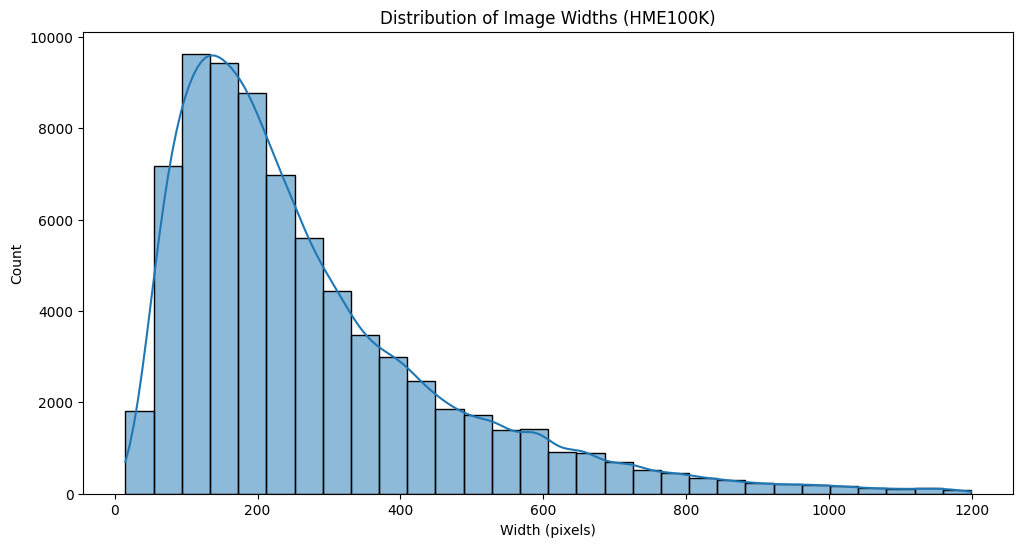

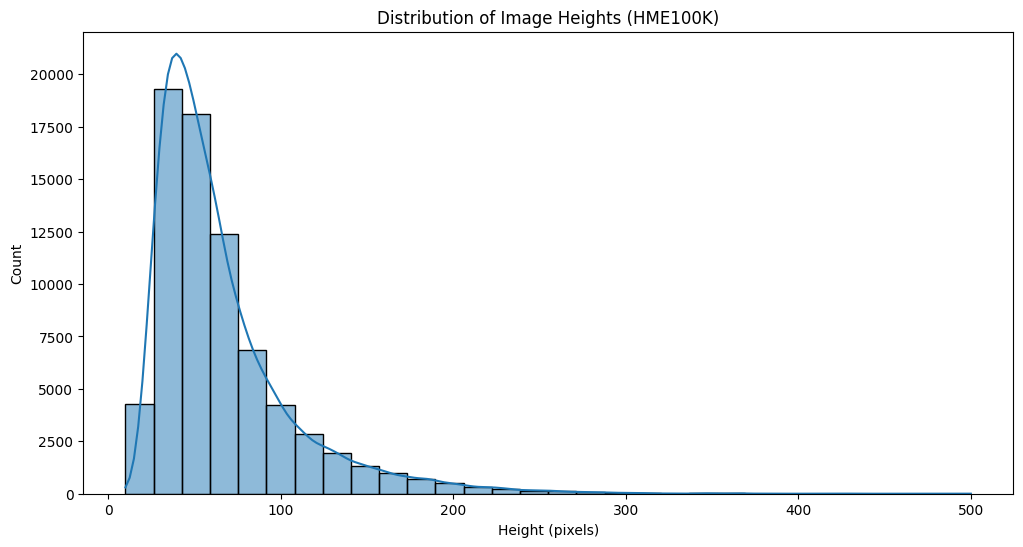

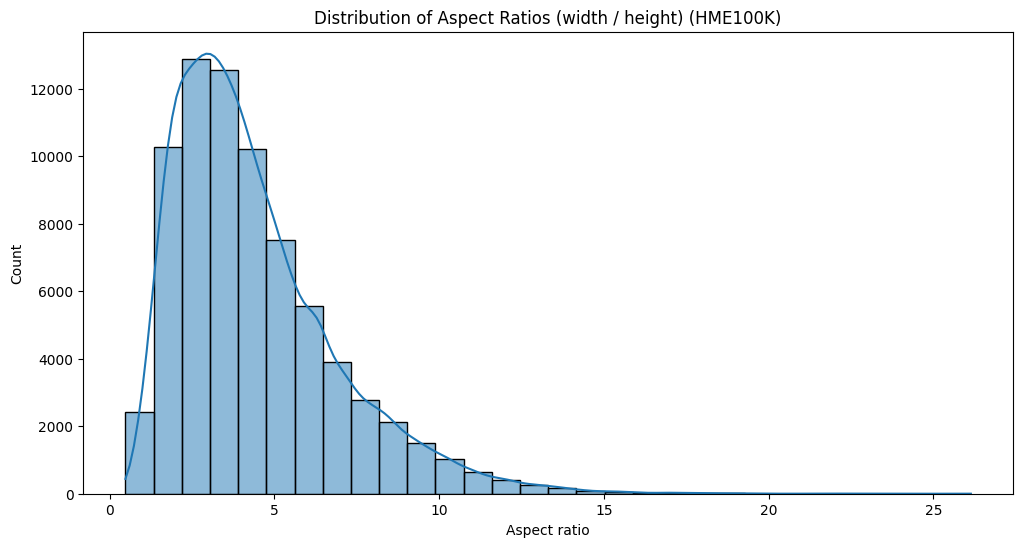

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(df_hme['width'], bins=30, kde=True)
plt.title("Distribution of Image Widths (HME100K)")
plt.xlabel("Width (pixels)")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df_hme['height'], bins=30, kde=True)
plt.title("Distribution of Image Heights (HME100K)")
plt.xlabel("Height (pixels)")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df_hme['aspect_ratio'], bins=30, kde=True)
plt.title("Distribution of Aspect Ratios (width / height) (HME100K)")
plt.xlabel("Aspect ratio")
plt.show()

Width percentiles: [134. 215. 354.]
Height percentiles: [39. 54. 79.]
Aspect ratio percentiles: [2.59574468 3.84090909 5.61634615]


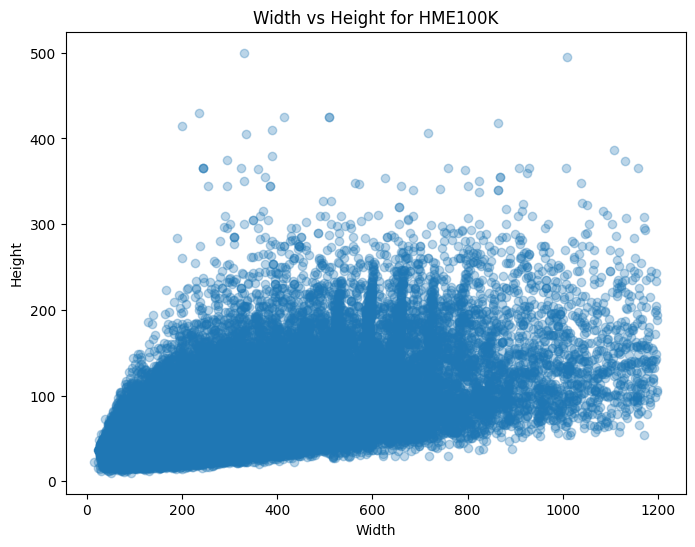

In [8]:
widths = df_hme['width'].values
heights = df_hme['height'].values
aspect_ratios = df_hme['aspect_ratio'].values

print("Width percentiles:", np.percentile(widths, [25, 50, 75]))
print("Height percentiles:", np.percentile(heights, [25, 50, 75]))
print("Aspect ratio percentiles:", np.percentile(aspect_ratios, [25, 50, 75]))

plt.figure(figsize=(8,6))
plt.scatter(widths, heights, alpha=0.3)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Width vs Height for HME100K")
plt.show()


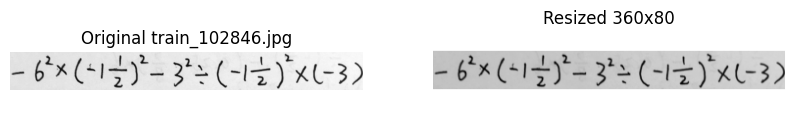

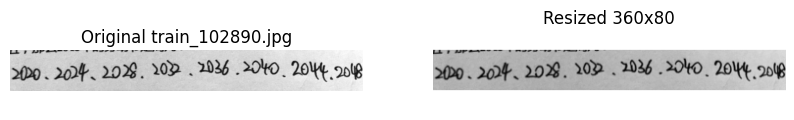

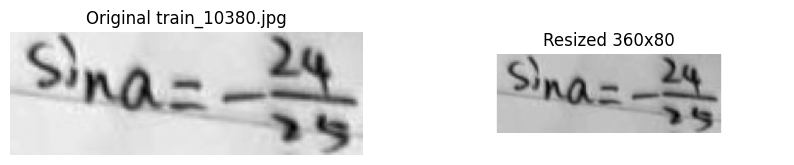

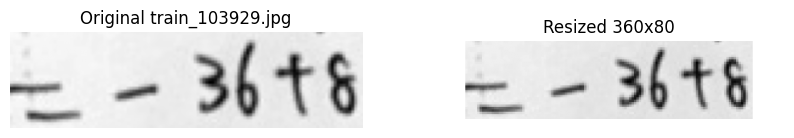

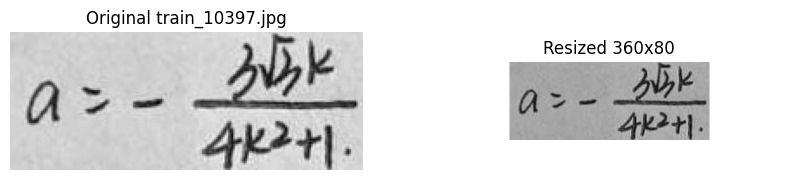

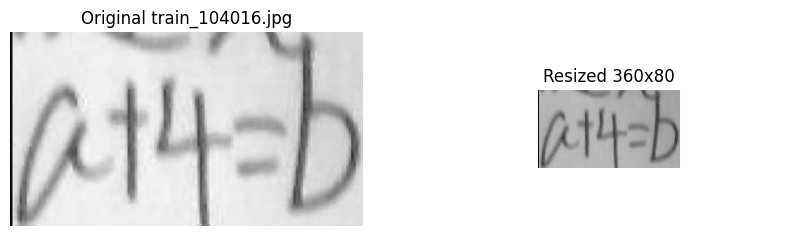

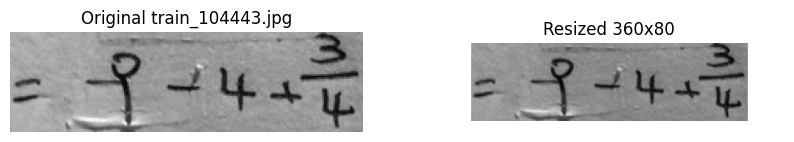

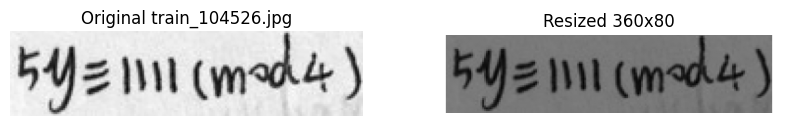

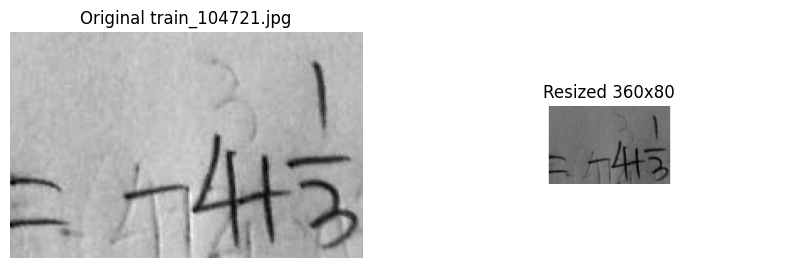

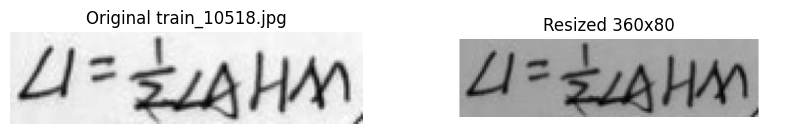

In [9]:
hme_folder = Path("../samples/HME100K")
img_files = sorted(hme_folder.glob("*.*"))[:10]  # first 10 images
target_width = 360
target_height = 80
pad_value = 255  # white background

for i, img_path in enumerate(img_files, 1):
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Skipping {img_path.name}, could not read image.")
        continue

    resized_img = resize_and_pad(img, target_width=target_width, target_height=target_height, pad_value=pad_value)

    # Display original and resized
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original {img_path.name}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(resized_img, cmap='gray')
    plt.title(f"Resized {resized_img.shape[1]}x{resized_img.shape[0]}")
    plt.axis('off')

    plt.show()


In [10]:
hme_records = []

for img_path in hme_folder.glob("*.*"):
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    
    h, w = img.shape[:2]
    hme_records.append({
        "filename": img_path.name,
        "width": w,
        "height": h,
        "aspect_ratio": w / h
    })

# Create DataFrame for this folder
df_hme_sample = pd.DataFrame(hme_records)

df_hme_sample.head()


,filename,width,height,aspect_ratio
0,train_18035.jpg,132,82,1.609756
1,train_72860.jpg,192,29,6.620690
2,train_66716.jpg,595,90,6.611111
3,train_29469.jpg,202,66,3.060606
4,train_42440.jpg,78,39,2.000000


train_26347.jpg: Original size = 1155x97, Resized size = 360x80


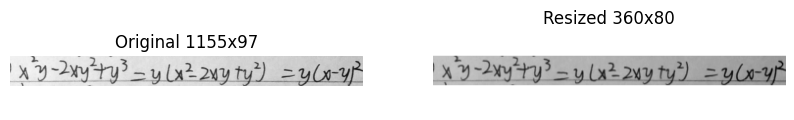

train_110207.jpg: Original size = 880x300, Resized size = 360x80


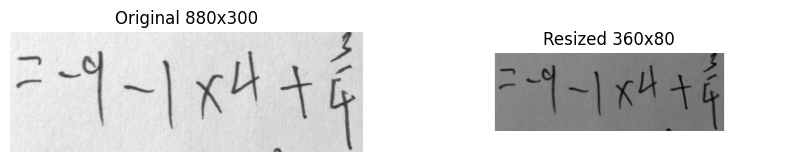

train_78278.jpg: Original size = 32x34, Resized size = 360x80


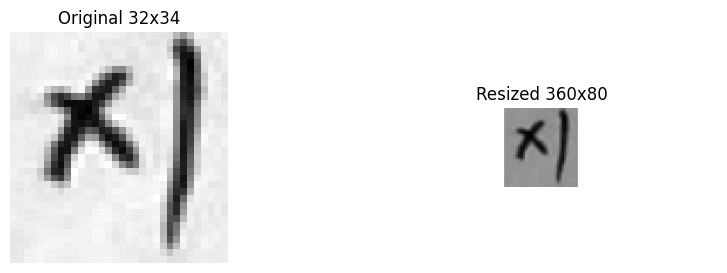

train_11483.jpg: Original size = 128x16, Resized size = 360x80


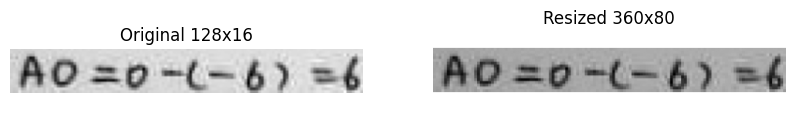

train_9736.jpg: Original size = 756x56, Resized size = 360x80


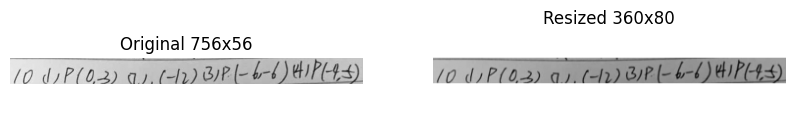

train_78278.jpg: Original size = 32x34, Resized size = 360x80


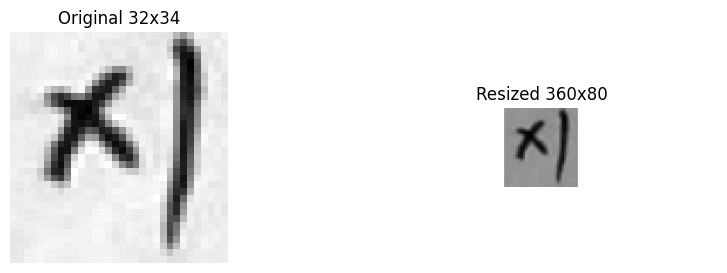

In [12]:
widest_img = df_hme_sample.loc[df_hme_sample['width'].idxmax()]['filename']
tallest_img = df_hme_sample.loc[df_hme_sample['height'].idxmax()]['filename']
narrowest_img = df_hme_sample.loc[df_hme_sample['width'].idxmin()]['filename']
shortest_img = df_hme_sample.loc[df_hme_sample['height'].idxmin()]['filename']
widest_ratio_img = df_hme_sample.loc[df_hme_sample['aspect_ratio'].idxmax()]['filename']
square_ratio_img = df_hme_sample.loc[df_hme_sample['aspect_ratio'].idxmin()]['filename']

target_width = 360
target_height = 80
pad_value = 255

extreme_imgs = [
    widest_img,
    tallest_img,
    narrowest_img,
    shortest_img,
    widest_ratio_img,
    square_ratio_img
]

# Loop over extreme images
for img_name in extreme_imgs:
    img_path = os.path.join(hme_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Skipping {img_name}, could not read image.")
        continue

    orig_h, orig_w = img.shape[:2]

    resized_img = resize_and_pad(img, target_width=target_width, target_height=target_height, pad_value=pad_value)
    resized_h, resized_w = resized_img.shape[:2]

    print(f"{img_name}: Original size = {orig_w}x{orig_h}, Resized size = {resized_w}x{resized_h}")

    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original {orig_w}x{orig_h}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(resized_img, cmap='gray')
    plt.title(f"Resized {resized_w}x{resized_h}")
    plt.axis('off')

    plt.show()



In [13]:
hme_folder = "../samples/HME100K"
output_folder = "../samples/processed1_sized_HME"
os.makedirs(output_folder, exist_ok=True)

target_width = 360
target_height = 80
pad_value = 255 

img_files = [f for f in os.listdir(hme_folder) if f.lower().endswith((".png",".jpg",".jpeg",".bmp"))]

print(f"Found {len(img_files)} images in {hme_folder}")

for img_name in tqdm(img_files, desc="Resizing HME images"):
    in_path = os.path.join(hme_folder, img_name)
    out_path = os.path.join(output_folder, img_name)

    img = cv2.imread(in_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    resized = resize_and_pad(img, target_width=target_width, target_height=target_height, pad_value=pad_value)

    cv2.imwrite(out_path, resized)

print("All resized images saved to:", output_folder)

Found 200 images in ../samples/HME100K


Resizing HME images: 100%|██████████████████| 200/200 [00:00<00:00, 4109.34it/s]

All resized images saved to: ../samples/processed1_sized_HME
